# Step 1: Data Preparation and Visualization

* Generate Synthetic Data:

    * Use make_classification from sklearn.datasets to create a synthetic 2D dataset for binary classification.
    * Specify parameters such as the number of informative features, redundant features, and clusters per class.

* Visualization:

  * Use matplotlib to create a scatter plot of the generated data.
  * Differentiate between classes using colors (e.g., positive class in one color and negative class in another).
  * The visualization helps in understanding the distribution and separability of the data.

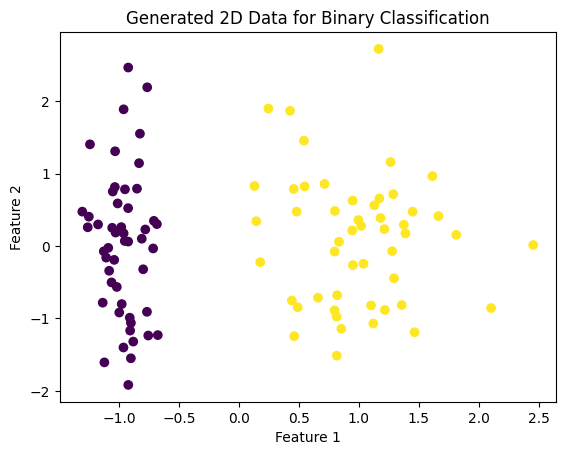

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic 2D data for binary classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Generated 2D Data for Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Step 2: Perceptron from Scratch

* Implemented a Perceptron class with methods for initialization, training (fit), and prediction.
* The perceptron is trained on the generated 2D data using the fit method.
* The predict method classifies data points based on the learned weights and bias.
* This step sets the foundation for understanding how a basic perceptron works for binary classification.

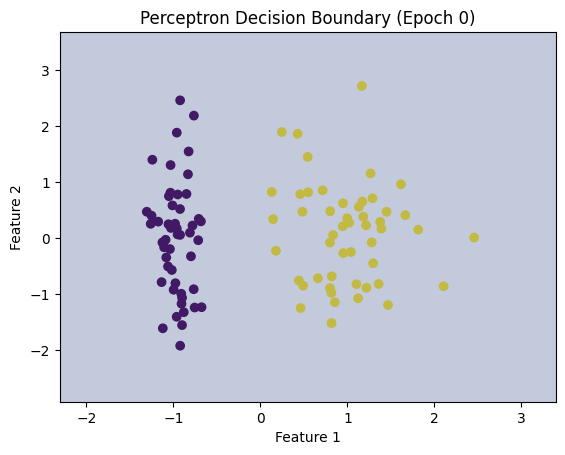

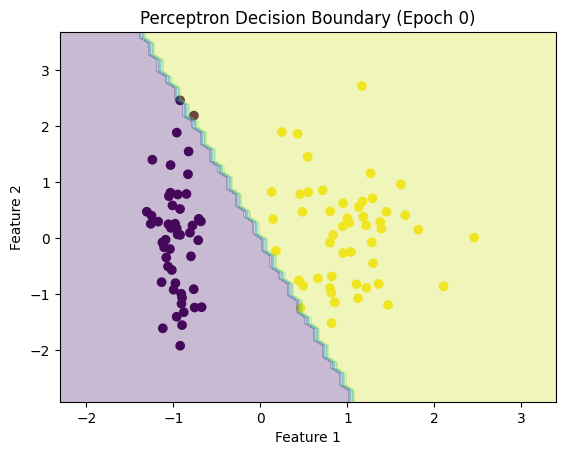

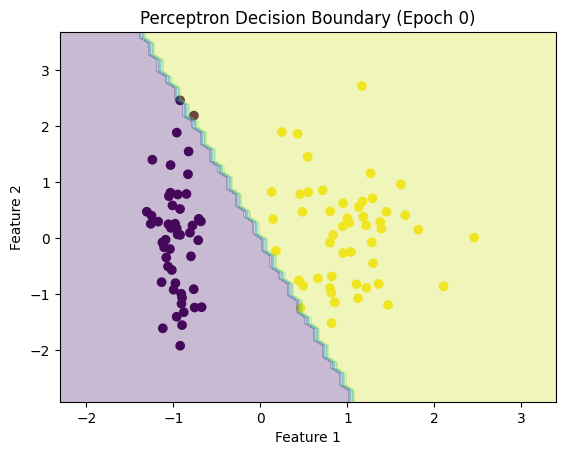

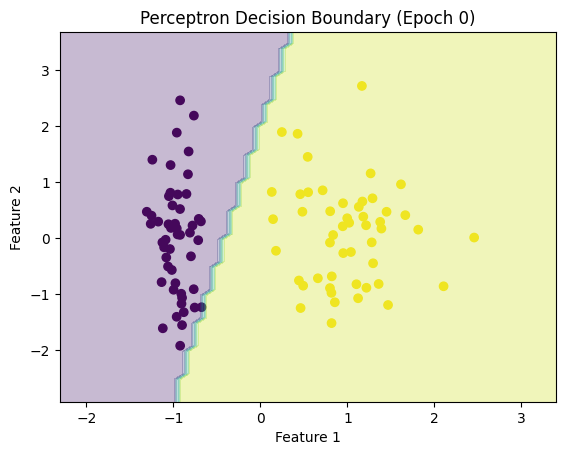

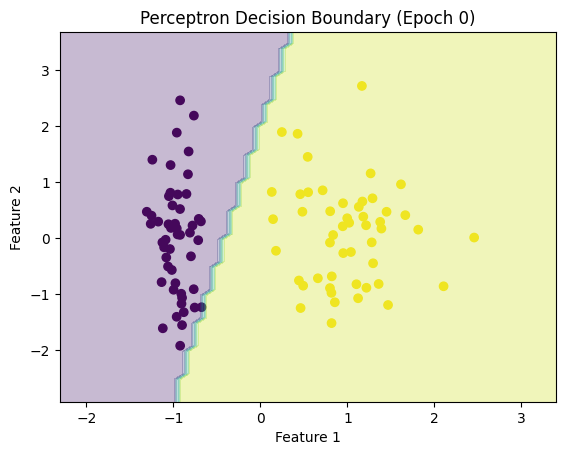

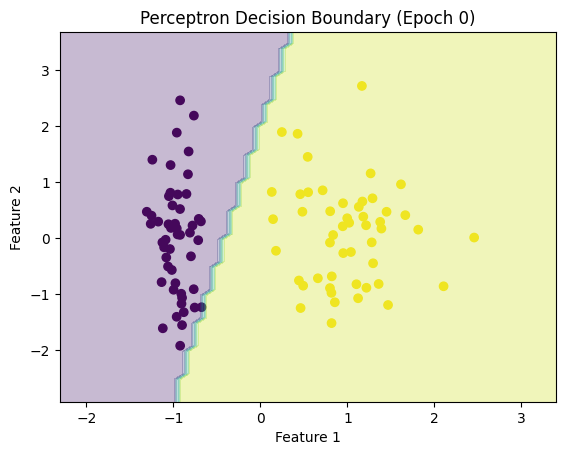

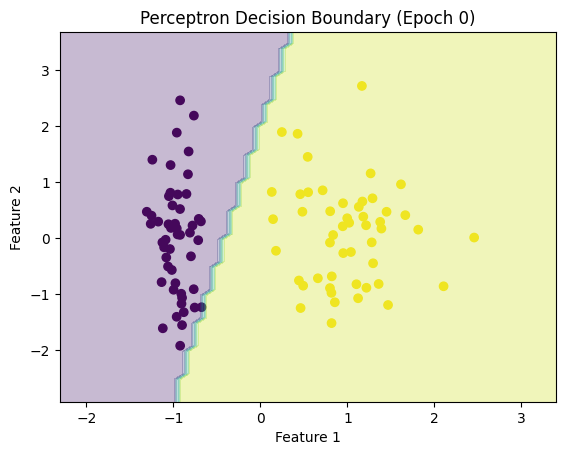

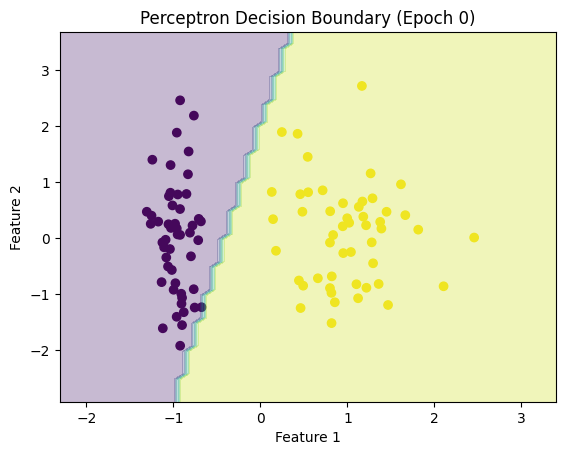

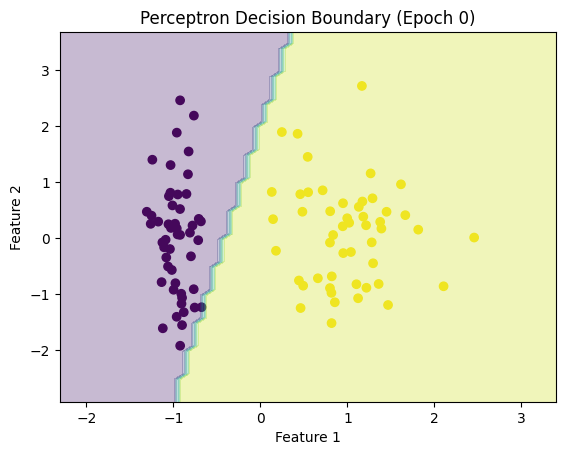

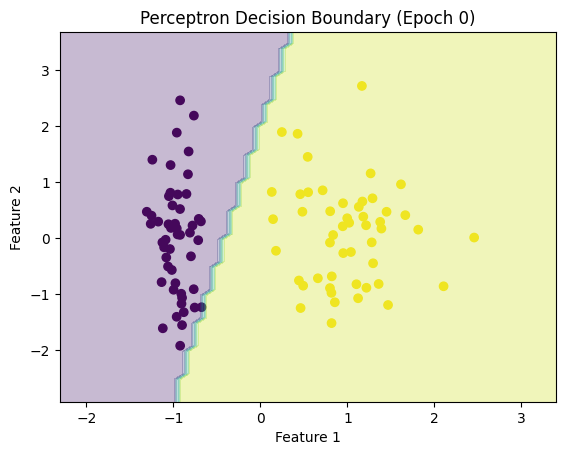

In [51]:
# Step 2: Perceptron from Scratch
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.n_iterations):
            for i in range(n_samples):
                prediction = self.predict(X[i])
                update = self.learning_rate * (y[i] - prediction)
                self.weights += update * X[i]
                self.bias += update

            # Visualize decision boundary at each epoch
            # if epoch % 1 == 0:
                if i%10==0:
                    self.plot_decision_boundary(X, y, epoch)

    def predict(self, X):
        return np.where((np.dot(X, self.weights) + self.bias) >= 0, 1, 0)


    def plot_decision_boundary(self, X, y, epoch):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
        plt.title(f'Perceptron Decision Boundary (Epoch {epoch})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = np.array(Z).reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
        plt.show()

# Call the function to generate and visualize data
# generate_and_visualize_data()

# Call the perceptron and visualize decision boundary with each epoch
perceptron_model = Perceptron()
perceptron_model.fit(X, y)


# Step 3: Logistic Regression from Scratch

* Training:

  * Utilized gradient descent to iteratively update weights and bias, minimizing logistic loss.
  * Printed logistic loss at intervals for tracking training progress.

* Visualization:

  * Created a method to visualize the decision boundary at specific epochs.
  * Showcased the evolving decision boundary on synthetic 2D data.

* Outcome:

  * Developed logistic regression for binary classification entirely from scratch.
  * Trained the model, monitored loss, and visualized decision boundaries to illustrate the learning process.

In [36]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def calculate_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()
        return loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            error = y - predictions

            # Gradient Descent
            gradient_weights = np.dot(X.T, error) / n_samples
            gradient_bias = np.sum(error) / n_samples

            # Update weights and bias
            self.weights += self.learning_rate * gradient_weights
            self.bias += self.learning_rate * gradient_bias

            # Visualize decision boundary and loss at each epoch
            if epoch % 5 == 0:
                loss = self.calculate_loss(y, predictions)
                print(f'Epoch {epoch}, Loss: {loss}')
                # self.plot_decision_boundary(X, y, epoch)

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.where(predictions >= 0.5, 1, 0)

    def plot_decision_boundary(self, X, y, epoch):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
        plt.title(f'Logistic Regression Decision Boundary (Epoch {epoch})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = np.array(Z).reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
        plt.show()


# Call the logistic regression and visualize decision boundary with each epoch
logistic_model = LogisticRegression()
logistic_model.fit(X, y)


Epoch 0, Loss: 0.6931471805599453
Epoch 5, Loss: 0.6813530421193446
Epoch 10, Loss: 0.6698738682337354
Epoch 15, Loss: 0.6587010276192063
Epoch 20, Loss: 0.6478259919579508
Epoch 25, Loss: 0.6372403503787454
Epoch 30, Loss: 0.6269358223355488
Epoch 35, Loss: 0.6169042689275814
Epoch 40, Loss: 0.607137702717244
Epoch 45, Loss: 0.5976282961128415
Epoch 50, Loss: 0.5883683883914362
Epoch 55, Loss: 0.5793504914433524
Epoch 60, Loss: 0.5705672943240585
Epoch 65, Loss: 0.562011666701589
Epoch 70, Loss: 0.5536766612885057
Epoch 75, Loss: 0.5455555153468784
Epoch 80, Loss: 0.5376416513531025
Epoch 85, Loss: 0.5299286769067546
Epoch 90, Loss: 0.5224103839643307
Epoch 95, Loss: 0.5150807474747789


# Step 4: Perceptron and Logistic Regression using sklearn

**Perceptron:**

* Initialization: Initialize the Perceptron model using Perceptron from scikit-learn.
* Training: Fit the Perceptron model on the training data using the fit method.
Prediction: Use the trained Perceptron model to make predictions on the test set with the predict method.
* Evaluation: Assess the accuracy of the Perceptron model by comparing its predictions to the true labels.

**Logistic Regression:**

* Initialization: Import LogisticRegression from scikit-learn.
* Training: Create an instance of the Logistic Regression model and train it on the training data using the fit method.
* Prediction: Use the trained Logistic Regression model to make predictions on the test set with the predict method.
* Evaluation: Evaluate the accuracy of the Logistic Regression model by comparing its predictions to the true labels.


**NOTE:**
1.
In scikit-learn's LogisticRegression, the concept of "epochs" isn't explicitly used in the same way as it might be in other implementations. The parameter that controls the number of iterations is max_iter. This parameter represents the maximum number of iterations taken for the solver to converge. If the solver doesn't converge within the specified number of iterations, it will stop, and the model may not reach the optimal solution. The actual number of iterations taken for the solver to converge is available through the n_iter_ attribute after training.
2. Low value of C => n_iter=1
   High value of C => n_iter=19

In [52]:
from sklearn.linear_model import Perceptron, LogisticRegression

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Perceptron using sklearn
# perceptron_model_sklearn = Perceptron()
# perceptron_model_sklearn.fit(X_train, y_train)
# perceptron_predictions_sklearn = perceptron_model_sklearn.predict(X_test)

# Logistic Regression using sklearn
logistic_model_sklearn = LogisticRegression(max_iter=1000, random_state=42, C = 100000)
logistic_model_sklearn.fit(X_train, y_train)
logistic_predictions_sklearn = logistic_model_sklearn.predict(X_test)

print(f"Number of Training iterations: {logistic_model_sklearn.n_iter_[0]}")


Number of Training iterations: 19


In [53]:
# parameters of logistic regression
logistic_model = LogisticRegression(penalty='l2',
                    dual=False,
                    tol=0.0001,
                    C=1.0,
                    fit_intercept=True,
                    intercept_scaling=1,
                    class_weight=None,
                    random_state=None,
                    solver='lbfgs',
                    max_iter=100,
                    multi_class='auto',
                    verbose=0,
                    warm_start=False,
                    n_jobs=None,
                    l1_ratio=None)


# penalty = 'l2','l1','elasticnet' ; default = 'l2'

# dual : Prefer dual=False when n_samples > n_features ; default=False

# tol, default=1e-4 . Tolerance for stopping criteria i.e. Convergence is achieved when changes in the model parameters become very small, indicating that the optimization process has reached a stable solution.
# The tolerance for convergence is controlled by the tol parameter, which specifies the desired level of precision.


# C, default=1.0. Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
# If C is low => More emphasis on regularisation and training completes with convergence achieved quickly. For eg. C=0.0000001; logistic_model_sklearn.n_iter_=1
# If C is high => Less emphasis on regularisation and training completes with convergence achieved slowly. For eg. C=1000000; logistic_model_sklearn.n_iter_=19

# fit_intercept, default=True Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

# class_weight dict or ‘balanced’, default=None . Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

# random_state, RandomState instance, default=None Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data. See Glossary for details.

# solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
# Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
# ‘liblinear’ is limited to one-versus-rest schemes.
# ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.
# Warning The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
# ‘lbfgs’ - [‘l2’, None]
# ‘liblinear’ - [‘l1’, ‘l2’]
# ‘newton-cg’ - [‘l2’, None]
# ‘newton-cholesky’ - [‘l2’, None]
# ‘sag’ - [‘l2’, None]
# ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]
# Note ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.


# max_iterint, default=100 Maximum number of iterations taken for the solvers to converge.

# multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’

# verboseint, default=0 For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.

# warm_start, default=False When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Useless for liblinear solver. See the Glossary.

# n_jobsint, default=None
# Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the solver is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors

# l1_ratio, default=None
# The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.


# Step 5: Visualize the Changes in the Bifurcating Line with Each Epoch

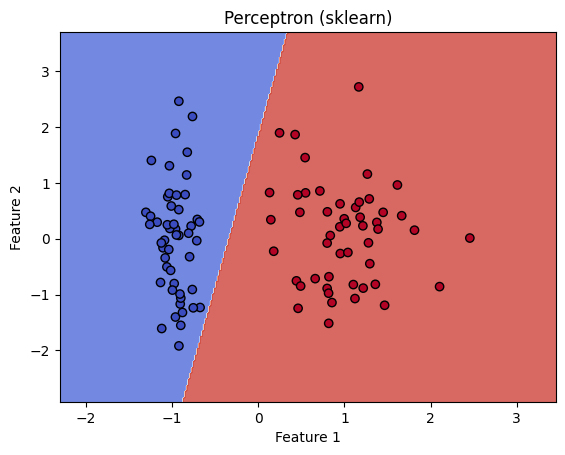

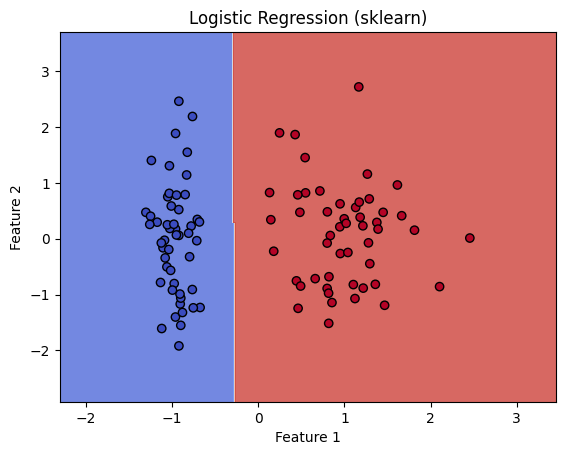

In [54]:
# Visualization function for decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# # Visualize Perceptron decision boundary at different epochs
# perceptron_model_scratch = Perceptron()
# for epoch in range(1, 6):
#     perceptron_model_scratch.fit(X_train, y_train)
#     plot_decision_boundary(perceptron_model_scratch, X, y, f'Perceptron (Epoch {epoch})')

# # Visualize Logistic Regression decision boundary at different epochs
# logistic_model_scratch = LogisticRegression()
# for epoch in range(1, 6):
#     logistic_model_scratch.fit(X_train, y_train)
#     plot_decision_boundary(logistic_model_scratch, X, y, f'Logistic Regression (Epoch {epoch})')

# # Visualize decision boundaries for sklearn models
plot_decision_boundary(perceptron_model_sklearn, X, y, 'Perceptron (sklearn)')
plot_decision_boundary(logistic_model_sklearn, X, y, 'Logistic Regression (sklearn)')
